## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.513066 -1.284062 -0.512148  1.143418 -0.304525 -0.265856
1  0.518058 -1.277564  0.589867  1.497317 -1.091857 -0.260326
2 -1.682714 -0.094773 -1.075000  0.663115 -1.022617 -0.955374
3 -0.255643  0.945229 -0.056939 -1.483580 -1.662940 -1.043272
4  1.521166  0.274591 -0.125387 -0.435571  1.073423  0.719755


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9958043	total: 60.9ms	remaining: 1m
1:	learn: 0.9850578	total: 61.4ms	remaining: 30.6s
2:	learn: 0.9752638	total: 61.9ms	remaining: 20.6s
3:	learn: 0.9639581	total: 62.3ms	remaining: 15.5s
4:	learn: 0.9546534	total: 62.7ms	remaining: 12.5s
5:	learn: 0.9447835	total: 63ms	remaining: 10.4s
6:	learn: 0.9350215	total: 63.3ms	remaining: 8.98s
7:	learn: 0.9243190	total: 63.7ms	remaining: 7.9s
8:	learn: 0.9154886	total: 64.1ms	remaining: 7.05s
9:	learn: 0.9072381	total: 64.4ms	remaining: 6.37s
10:	learn: 0.8970325	total: 64.7ms	remaining: 5.82s
11:	learn: 0.8883855	total: 65.1ms	remaining: 5.36s
12:	learn: 0.8776400	total: 65.5ms	remaining: 4.97s
13:	learn: 0.8680463	total: 65.8ms	remaining: 4.63s
14:	learn: 0.8596804	total: 66.2ms	remaining: 4.34s
15:	learn: 0.8521579	total: 66.5ms	remaining: 4.09s
16:	learn: 0.8449054	total: 67ms	remaining: 3.87s
17:	learn: 0.8375032	total: 67.3ms	remaining: 3.67s
18:	learn: 0.8308518	total: 67.6ms	remaining: 3.49s


73:	learn: 0.5119563	total: 94.5ms	remaining: 1.18s
74:	learn: 0.5077091	total: 94.9ms	remaining: 1.17s
75:	learn: 0.5038300	total: 95.6ms	remaining: 1.16s
76:	learn: 0.4999150	total: 96.1ms	remaining: 1.15s
77:	learn: 0.4948101	total: 96.5ms	remaining: 1.14s
78:	learn: 0.4908945	total: 97ms	remaining: 1.13s
79:	learn: 0.4869470	total: 97.3ms	remaining: 1.12s
80:	learn: 0.4821422	total: 97.9ms	remaining: 1.11s
81:	learn: 0.4781441	total: 99ms	remaining: 1.11s
82:	learn: 0.4742065	total: 99.5ms	remaining: 1.1s
83:	learn: 0.4703578	total: 99.9ms	remaining: 1.09s
84:	learn: 0.4657640	total: 100ms	remaining: 1.08s
85:	learn: 0.4615489	total: 101ms	remaining: 1.07s
86:	learn: 0.4571308	total: 101ms	remaining: 1.06s
87:	learn: 0.4527263	total: 102ms	remaining: 1.05s
88:	learn: 0.4489852	total: 102ms	remaining: 1.05s
89:	learn: 0.4452130	total: 103ms	remaining: 1.04s
90:	learn: 0.4413293	total: 103ms	remaining: 1.03s
91:	learn: 0.4377553	total: 104ms	remaining: 1.02s
92:	learn: 0.4347181	tota

254:	learn: 0.1283846	total: 184ms	remaining: 537ms
255:	learn: 0.1274628	total: 185ms	remaining: 536ms
256:	learn: 0.1264443	total: 185ms	remaining: 535ms
257:	learn: 0.1255590	total: 186ms	remaining: 534ms
258:	learn: 0.1245909	total: 186ms	remaining: 532ms
259:	learn: 0.1235518	total: 186ms	remaining: 530ms
260:	learn: 0.1226077	total: 187ms	remaining: 530ms
261:	learn: 0.1217079	total: 187ms	remaining: 528ms
262:	learn: 0.1207782	total: 188ms	remaining: 527ms
263:	learn: 0.1198281	total: 189ms	remaining: 526ms
264:	learn: 0.1189533	total: 189ms	remaining: 525ms
265:	learn: 0.1181134	total: 190ms	remaining: 523ms
266:	learn: 0.1173113	total: 190ms	remaining: 521ms
267:	learn: 0.1163731	total: 190ms	remaining: 520ms
268:	learn: 0.1155094	total: 191ms	remaining: 519ms
269:	learn: 0.1146346	total: 191ms	remaining: 517ms
270:	learn: 0.1137504	total: 192ms	remaining: 516ms
271:	learn: 0.1129100	total: 192ms	remaining: 515ms
272:	learn: 0.1119576	total: 193ms	remaining: 514ms
273:	learn: 

449:	learn: 0.0388275	total: 277ms	remaining: 339ms
450:	learn: 0.0386562	total: 278ms	remaining: 338ms
451:	learn: 0.0384076	total: 278ms	remaining: 337ms
452:	learn: 0.0382015	total: 279ms	remaining: 336ms
453:	learn: 0.0380179	total: 279ms	remaining: 336ms
454:	learn: 0.0378479	total: 280ms	remaining: 335ms
455:	learn: 0.0376848	total: 280ms	remaining: 334ms
456:	learn: 0.0374467	total: 281ms	remaining: 333ms
457:	learn: 0.0372219	total: 281ms	remaining: 332ms
458:	learn: 0.0370460	total: 281ms	remaining: 332ms
459:	learn: 0.0368900	total: 282ms	remaining: 331ms
460:	learn: 0.0366722	total: 282ms	remaining: 330ms
461:	learn: 0.0364585	total: 283ms	remaining: 329ms
462:	learn: 0.0362841	total: 283ms	remaining: 329ms
463:	learn: 0.0361156	total: 284ms	remaining: 328ms
464:	learn: 0.0359507	total: 284ms	remaining: 327ms
465:	learn: 0.0357894	total: 285ms	remaining: 326ms
466:	learn: 0.0356315	total: 285ms	remaining: 326ms
467:	learn: 0.0354754	total: 286ms	remaining: 325ms
468:	learn: 

638:	learn: 0.0178615	total: 368ms	remaining: 208ms
639:	learn: 0.0177631	total: 368ms	remaining: 207ms
640:	learn: 0.0176692	total: 369ms	remaining: 207ms
641:	learn: 0.0175623	total: 369ms	remaining: 206ms
642:	learn: 0.0175230	total: 370ms	remaining: 205ms
643:	learn: 0.0174292	total: 370ms	remaining: 205ms
644:	learn: 0.0173906	total: 370ms	remaining: 204ms
645:	learn: 0.0173552	total: 371ms	remaining: 203ms
646:	learn: 0.0173191	total: 371ms	remaining: 203ms
647:	learn: 0.0172285	total: 372ms	remaining: 202ms
648:	learn: 0.0171643	total: 372ms	remaining: 201ms
649:	learn: 0.0170754	total: 372ms	remaining: 201ms
650:	learn: 0.0170216	total: 373ms	remaining: 200ms
651:	learn: 0.0169878	total: 373ms	remaining: 199ms
652:	learn: 0.0169393	total: 374ms	remaining: 199ms
653:	learn: 0.0168862	total: 374ms	remaining: 198ms
654:	learn: 0.0168453	total: 375ms	remaining: 197ms
655:	learn: 0.0168051	total: 375ms	remaining: 197ms
656:	learn: 0.0167398	total: 376ms	remaining: 196ms
657:	learn: 

833:	learn: 0.0094643	total: 461ms	remaining: 91.8ms
834:	learn: 0.0094497	total: 462ms	remaining: 91.3ms
835:	learn: 0.0094047	total: 462ms	remaining: 90.7ms
836:	learn: 0.0093832	total: 463ms	remaining: 90.1ms
837:	learn: 0.0093440	total: 463ms	remaining: 89.6ms
838:	learn: 0.0093005	total: 464ms	remaining: 89ms
839:	learn: 0.0092829	total: 464ms	remaining: 88.4ms
840:	learn: 0.0092672	total: 465ms	remaining: 87.9ms
841:	learn: 0.0092532	total: 465ms	remaining: 87.3ms
842:	learn: 0.0092107	total: 466ms	remaining: 86.7ms
843:	learn: 0.0092014	total: 466ms	remaining: 86.2ms
844:	learn: 0.0091796	total: 467ms	remaining: 85.6ms
845:	learn: 0.0091657	total: 467ms	remaining: 85.1ms
846:	learn: 0.0091486	total: 468ms	remaining: 84.5ms
847:	learn: 0.0091111	total: 468ms	remaining: 83.9ms
848:	learn: 0.0090975	total: 469ms	remaining: 83.3ms
849:	learn: 0.0090837	total: 469ms	remaining: 82.8ms
850:	learn: 0.0090626	total: 469ms	remaining: 82.2ms
851:	learn: 0.0090216	total: 470ms	remaining: 81

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

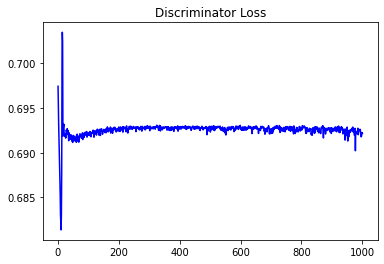

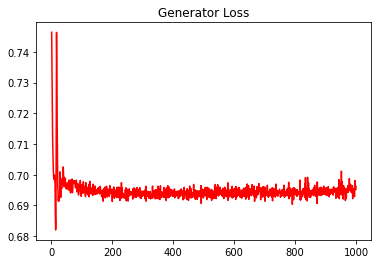

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.13102991146125417


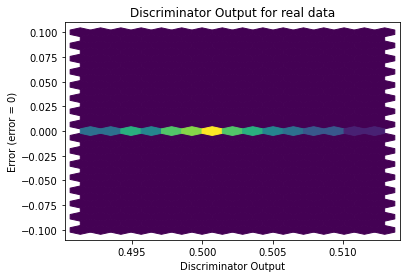

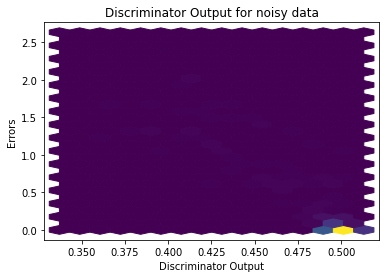

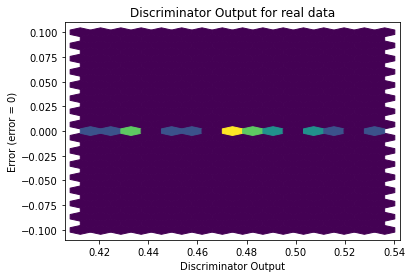

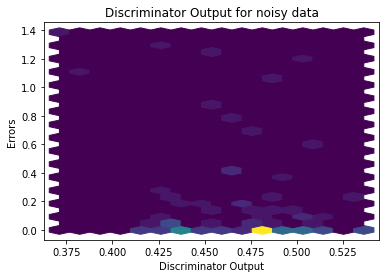

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


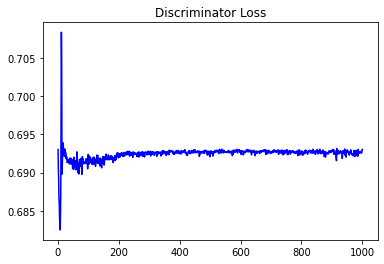

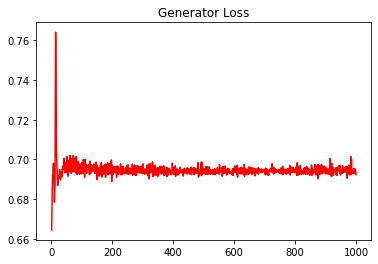

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.10620157679724328


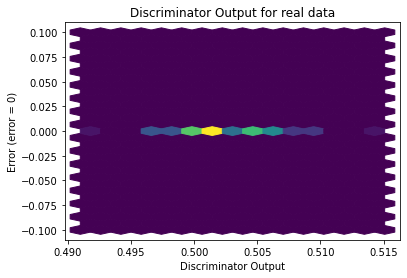

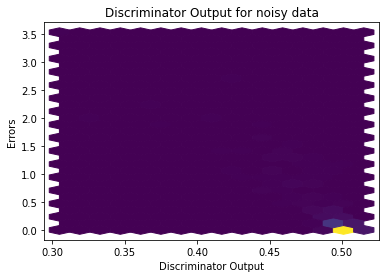

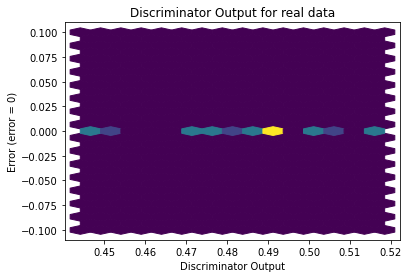

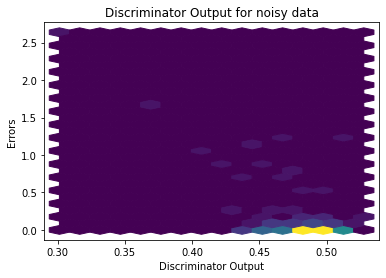

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9635]], requires_grad=True)
